In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
0,flat,ashiana apartment,sector 23,0.16,2051.0,780.0,2,2,2,1.0,Na,Moderately Old,780.0,NaN,NaN,0,0,0,0,0,0,0,0
1,house,independent,sector 39,1.80,21875.0,823.0,1,1,2,3.0,North-East,Relatively New,NaN,800.0,720.0,0,0,0,0,0,0,0,0
2,house,vipul tatvam villa,sector 48,7.35,22812.0,3222.0,4,5,2,2.0,South,Moderately Old,3222.0,NaN,NaN,1,1,1,1,0,4,1,144
3,flat,mapsko casa bella,sector 82,3.00,6134.0,4891.0,4,6,3+,25.0,West,Relatively New,4890.0,NaN,NaN,0,1,0,1,0,0,1,119
4,flat,ansal heights 86,sector 86,0.64,4706.0,1360.0,2,2,1,3.0,Na,New Property,NaN,1360.0,NaN,0,0,0,0,0,0,0,73


<Axes: xlabel='price'>

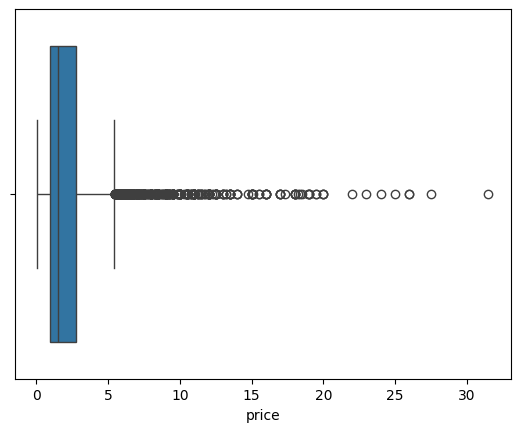

In [5]:
sns.boxplot(x=df['price'])

<Axes: xlabel='price', ylabel='Count'>

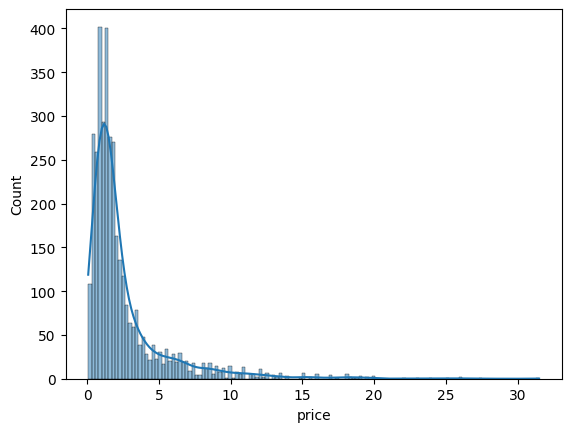

In [6]:
# outliers on the basis of price column
sns.histplot(data=df,x='price', kde=True)

In [7]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

**observation**
* on the basis of price column we can say that there are some genuine outliers but there are some data erros as well


In [8]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
494,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,7,9,3+,3.0,North-East,Moderately Old,9000.0,NaN,NaN,1,1,1,1,0,9,2,74
1524,house,independent,sector 43,27.50,24366.0,11286.0,6,7,3+,3.0,North-East,Relatively New,11286.0,NaN,NaN,1,1,0,1,1,10,1,42
3631,house,independent,sector 26,26.00,82540.0,3150.0,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,26,2,72
1767,house,dlf city plots,sector 26,26.00,57206.0,4545.0,6,7,3+,2.0,North-East,New Property,4545.0,NaN,NaN,1,1,0,1,1,10,1,138
2331,house,suncity township,sector 54,25.00,31111.0,8036.0,4,4,3+,2.0,North,Moderately Old,8036.0,NaN,NaN,1,1,1,1,0,0,0,0
3045,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,5,5,2,1.0,North-East,Old Property,400.0,NaN,NaN,1,1,0,1,0,0,1,122
824,house,independent,sector 26,23.00,25556.0,9000.0,4,4,3+,2.0,South-West,Relatively New,9000.0,NaN,NaN,1,1,1,1,0,5,1,145
1265,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,5,6,3,3.0,NaN,Moderately Old,8250.0,NaN,NaN,0,1,0,0,0,5,0,54
1273,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,16,16,3+,4.0,NaN,New Property,4091.0,NaN,NaN,0,1,0,0,0,16,1,31
1939,house,independent,sector 26,20.00,44444.0,4500.0,5,7,3+,3.0,West,Relatively New,4500.0,NaN,NaN,0,1,0,1,0,5,2,97


### price_pr_sqft

<Axes: xlabel='price_per_sqft', ylabel='Count'>

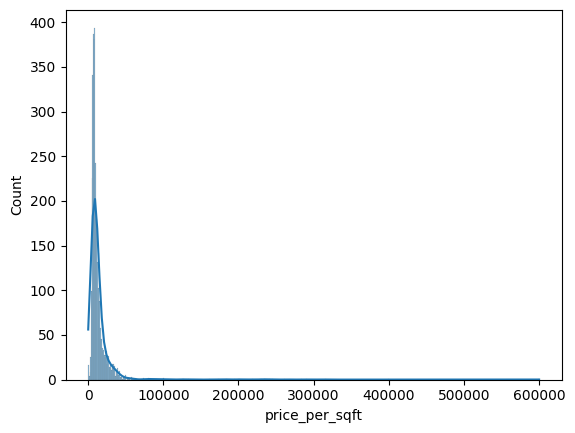

In [9]:
sns.histplot(data=df,x='price_per_sqft', kde=True)

<Axes: xlabel='price_per_sqft'>

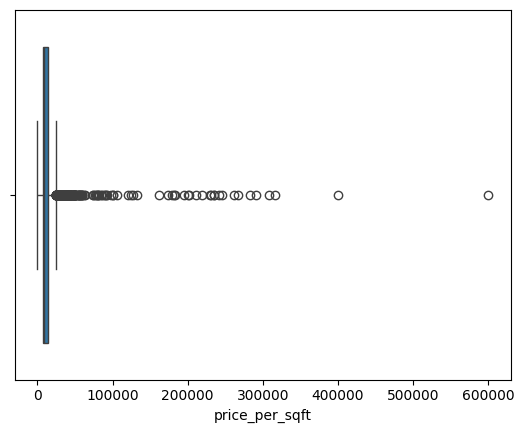

In [10]:
sns.boxplot(x=df['price_per_sqft'])

In [11]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [12]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

<ipython-input-12-8c5ad871d258>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [13]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

<ipython-input-13-f07934424e06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [14]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [15]:
df.update(outliers_sqft)

<ipython-input-16-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

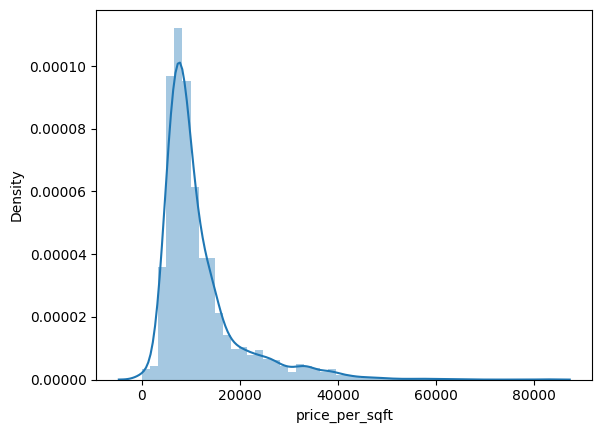

In [16]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

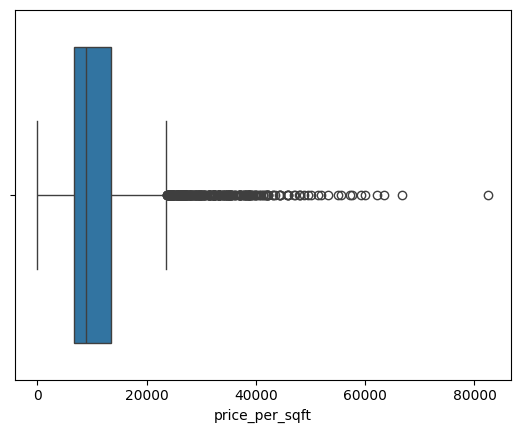

In [17]:
sns.boxplot(x=df['price_per_sqft'])

In [18]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
703,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,3.0,3.0,0,1.0,NaN,Moderately Old,1000.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
871,house,independent,sector 26,14.75,51864.0,2844.0,16.0,20.0,3+,4.0,East,New Property,2844.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,1.0,153.0
1244,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,4.0,4.0,3+,3.0,East,Moderately Old,3240.0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,20.0,2.0,75.0
1486,house,nul,sector 28,12.50,51440.0,2430.0,16.0,17.0,3+,4.0,South,Relatively New,2430.0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,16.0,2.0,137.0
1767,house,dlf city plots,sector 26,26.00,57206.0,4545.0,6.0,7.0,3+,2.0,North-East,New Property,4545.0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,10.0,1.0,138.0
2218,house,unitech escape,sector 50,10.80,60000.0,1800.0,4.0,4.0,3,2.0,North,Relatively New,NaN,250.0,200.0,1.0,1.0,1.0,1.0,0.0,5.0,1.0,103.0
2285,house,project housing board colony,sector 31,8.00,63492.0,1260.0,2.0,1.0,0,1.0,NaN,Undefined,NaN,140.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2593,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,4.0,5.0,3+,2.0,North,Old Property,2250.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,160.0
2670,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,3.0,3.0,0,7.0,Na,Undefined,NaN,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,5.0,5.0,2,1.0,North-East,Old Property,400.0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,1.0,122.0


In [19]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

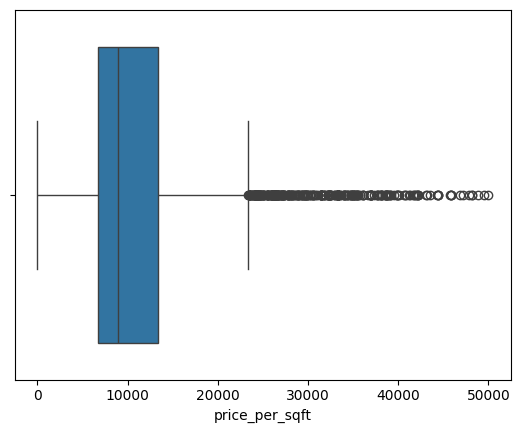

In [20]:
sns.boxplot(x=df['price_per_sqft'])

### area

<ipython-input-21-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

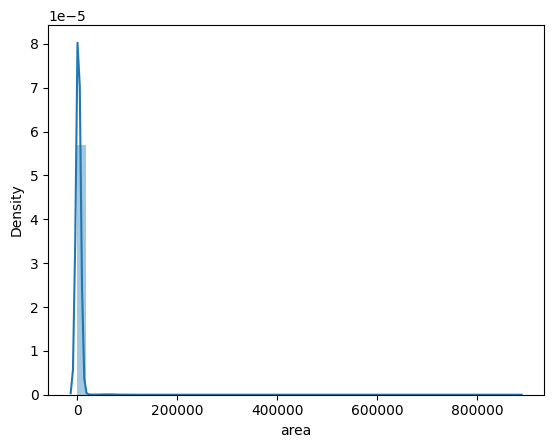

In [21]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

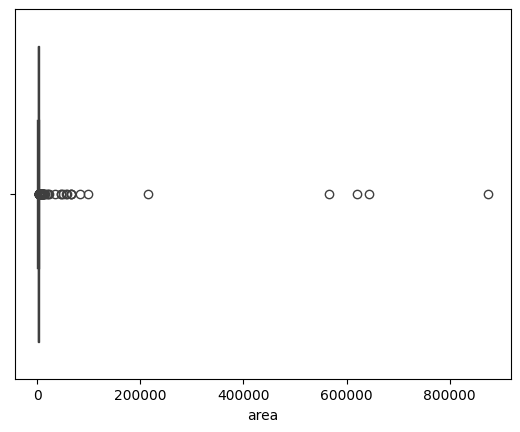

In [22]:
sns.boxplot(x=df['area'])

In [23]:
df[df['area']>100000]

,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
995,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,65.0
1791,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
2055,house,independent,sector 50,5.00,232.0,215517.0,6.0,5.0,3+,2.0,NaN,New Property,215517.0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
3679,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,2.0,2.0,2,8.0,Na,Relatively New,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,2.0,44.0
3754,flat,signature the roselia,sector 95,0.45,7.0,642857.0,2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0


In [24]:
df = df[df['area']<100000]

<Axes: xlabel='area'>

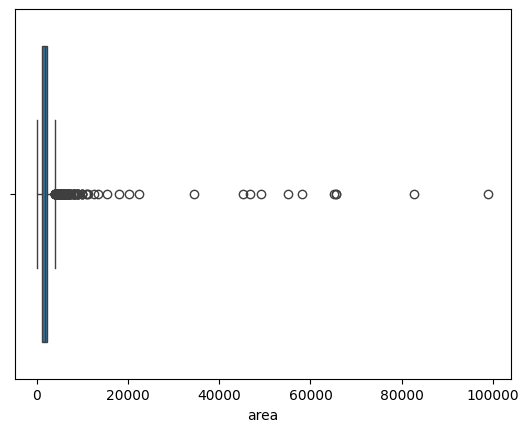

In [25]:
sns.boxplot(x=df['area'])

In [26]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
3057,house,independent,sector 26,18.40,1859.0,98978.0,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,6.0,1.0,60.0
2980,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,10.0,6.0,2,3.0,South-East,Old Property,82781.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,2.0,0.0,7.0
715,flat,rof ananda,sector 95,0.38,58.0,65517.0,2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
1114,flat,rof ananda,sector 95,0.38,58.0,65517.0,3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
2780,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1489,flat,pyramid elite,sector 86,0.46,79.0,58228.0,2.0,2.0,1,0.0,Na,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
1011,flat,rof ananda,sector 95,0.33,60.0,55000.0,2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
657,flat,signature the serenas,sohna road,0.28,57.0,49123.0,1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
3135,house,independent,sector 25,7.30,1560.0,46795.0,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,0.0,1.0,109.0
297,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.0


In [27]:
#1980 715 1114 1489 1011 657 1669
df.drop(index=[1980,715,1114,1489,1011,657,1669],inplace=True)

In [28]:
df[df['area']>40000]

,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
297,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.0
2780,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2980,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,10.0,6.0,2,3.0,South-East,Old Property,82781.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,2.0,0.0,7.0
3057,house,independent,sector 26,18.40,1859.0,98978.0,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,6.0,1.0,60.0
3135,house,independent,sector 25,7.30,1560.0,46795.0,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,109.0


In [29]:
df.drop(index=[297,2980],inplace=True)

<ipython-input-30-5d76ceae9310>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['area'])


<Axes: ylabel='Density'>

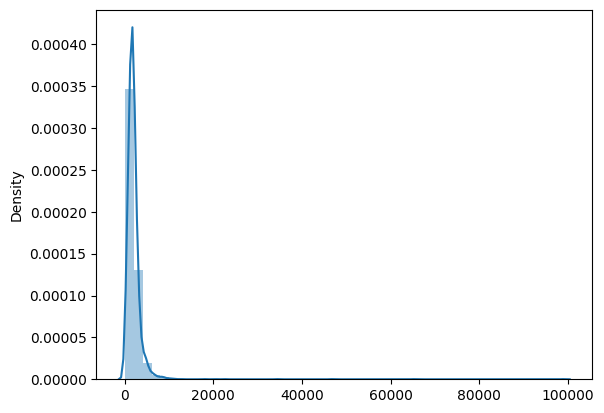

In [30]:
sns.distplot(x=df['area'])

### number of bedrooms

<ipython-input-31-926418d7e639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

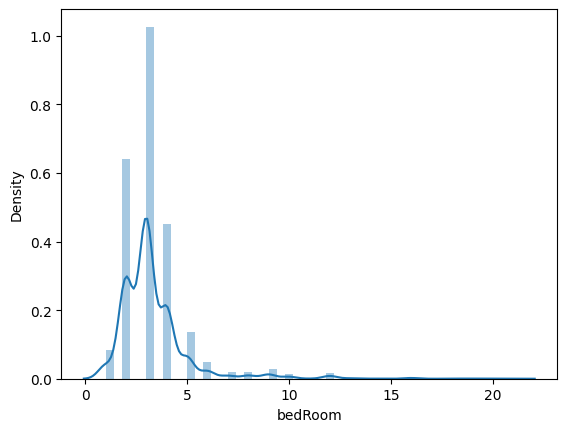

In [31]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

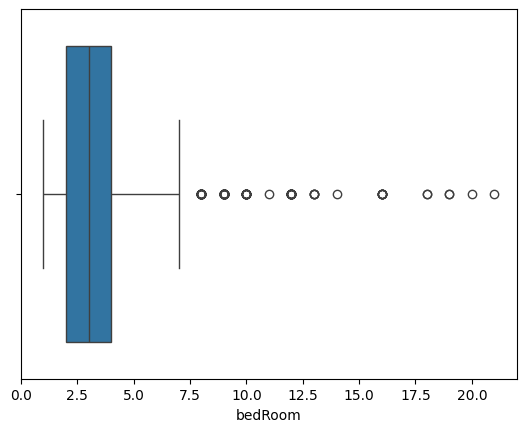

In [32]:
sns.boxplot(x=df['bedRoom'])

In [33]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
1659,house,independent,sector 54,5.00,43066.0,1161.0,21.0,21.0,3+,5.0,North,Relatively New,1161.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,21.0,2.0,49.0
2693,house,independent,sector 43,4.50,39062.0,1152.0,20.0,20.0,3+,4.0,East,Relatively New,1152.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,20.0,2.0,22.0
3783,house,independent,sector 17a,3.87,5160.0,7500.0,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,68.0
1928,house,independent,sector 17a,3.93,24214.0,1623.0,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,74.0
3758,house,independent,sector 54,5.50,38194.0,1440.0,18.0,18.0,3+,4.0,South-West,Relatively New,1440.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,36.0,2.0,70.0
444,house,private house,sector 55,7.05,46906.0,1503.0,18.0,18.0,3+,4.0,North-East,Relatively New,1503.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,18.0,2.0,57.0
1509,house,independent,sector 11,4.50,25000.0,1800.0,16.0,16.0,3+,4.0,South,Relatively New,1800.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,24.0,1.0,20.0
1273,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,16.0,16.0,3+,4.0,NaN,New Property,4091.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,16.0,1.0,31.0
3002,house,independent,sector 56,12.39,45889.0,2700.0,16.0,18.0,3+,4.0,North-East,New Property,2700.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,49.0
1042,house,independent,sector 55,9.19,34037.0,2700.0,16.0,18.0,2,4.0,West,New Property,2700.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,8.0,1.0,49.0


### super built up area

<ipython-input-34-ce4cb092a62b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

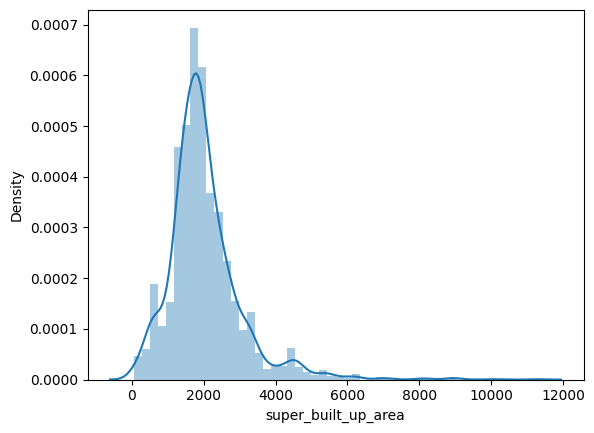

In [34]:
sns.distplot(df['super_built_up_area'])

### built up area

<ipython-input-35-7e13bd12b627>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

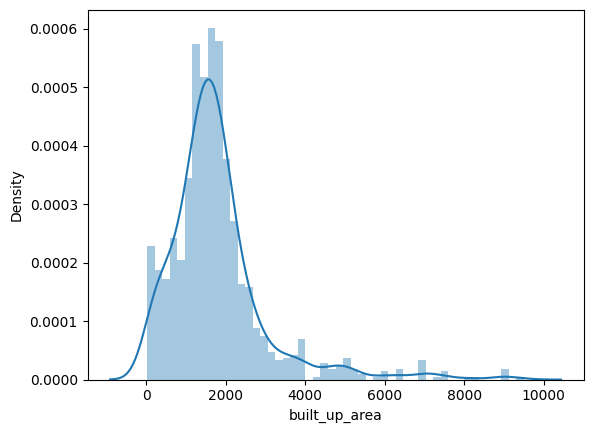

In [35]:
sns.distplot(df['built_up_area'])

In [36]:
df[df['built_up_area']>8000]

,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
118,house,dlf alameda,sector 73,17.0,35109.0,4842.0,5.0,8.0,3,3.0,North-West,Relatively New,NaN,9000.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,2.0,87.0
1397,house,anamika enclave,sector 12,6.0,14492.0,4140.0,9.0,9.0,3+,3.0,North-West,Old Property,NaN,9000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1434,house,ansal sushant lok plots,sector 43,11.5,17692.0,6500.0,7.0,8.0,3+,3.0,NaN,Old Property,NaN,9000.0,6500.0,0.0,1.0,1.0,1.0,0.0,7.0,1.0,31.0
1749,house,independent house sector 45,sector 40,9.0,38023.0,2367.0,12.0,12.0,3,4.0,North-West,New Property,NaN,9000.0,6000.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,71.0
2182,house,independent,sector 25,10.0,37037.0,2700.0,5.0,5.0,3+,3.0,East,Moderately Old,NaN,9500.0,9000.0,0.0,1.0,0.0,1.0,0.0,6.0,2.0,29.0
3563,house,independent,sector 56,8.0,9654.0,8287.0,10.0,10.0,3+,4.0,NaN,Relatively New,NaN,8286.0,NaN,1.0,1.0,0.0,1.0,0.0,12.0,2.0,107.0


### luxury score

<ipython-input-37-bd70b6910aad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

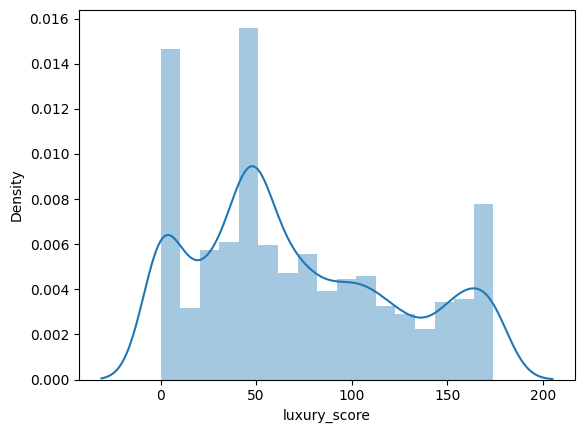

In [37]:
sns.distplot(df['luxury_score'])

In [38]:
df.shape

(3632, 23)

In [39]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [40]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

180.60000000000002

In [41]:
df.to_csv('gurgaon_properties_outlier_treated.csv')